In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats.stats import pearsonr
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Exercise 5.
df = pd.read_csv('funda-amsterdam.csv')
df.tail()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
11438,11438,Olympiaplein 83 -III,113,3,1077 CS,22-5-2015,599000,apartment,5,3-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
11439,11439,Anjeliersstraat 20,88,2,1015 NH,12-5-2015,399000,apartment,3,29-5-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1993
11440,11440,Rustenburgerstraat 389 I,77,2,1072 GV,6-6-2015,399000,apartment,4,19-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
11441,11441,Doggersbankstraat 12 II,90,3,1055 NX,2-5-2015,259000,apartment,4,19-5-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1931
11442,11442,Anna van Burenstraat 24 2,54,2,1055 VN,20-5-2015,165000,apartment,3,23-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1937


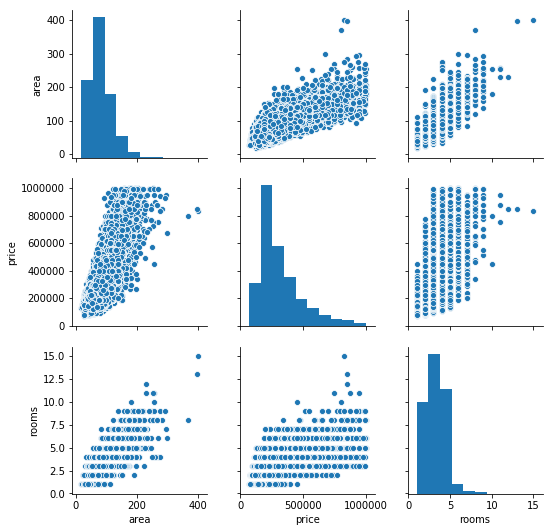

In [3]:
df = df[df['price']> 20000]
df_subset = df[["area", "price", "rooms"]]
sns.pairplot(df_subset)
plt.show()

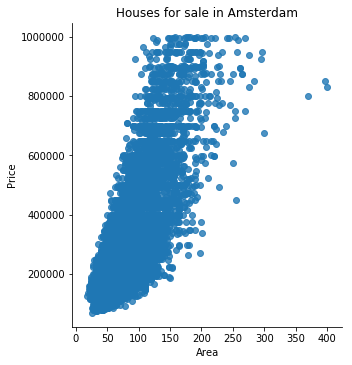

In [4]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Area') #use matplotlib to refine Seaborn plot
plt.ylabel('Price')
plt.title('Houses for sale in Amsterdam')
plt.show()

There is a correlation between area and price. The bigger the area the bigger the price. 

In [5]:
#Pearson’s correlation for the first relation
pearsonr(df["area"], df["price"])

(0.7250807666953685, 0.0)

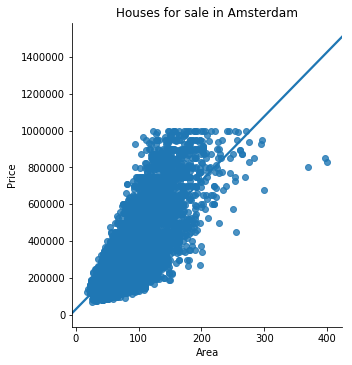

In [6]:
sns.lmplot(x='area', y='price', data=df, ci=False) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Area') #use matplotlib to refine Seaborn plot
plt.ylabel('Price')
plt.title('Houses for sale in Amsterdam')
plt.show()

x = area = independent variable

In [7]:
#Exercise 6.
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Tote that you need to use [[]] with x, because x could be multiple variables (each variable is a list)
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


In [8]:
lm.predict(70)

array([272900.93507299])

In [9]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


In [10]:
df[df["address"]== "Slichtenhorststraat 10"].head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983,426848.766916


In [11]:
residual = 426848.766916 - 234500
residual

192348.766916

In [12]:
#Exercise 7.
#Calculate residuals (e) and add them to the dataframe.
df["residual"] = df["price"] - df["price_p"]
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,residual
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756,104144.119244
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791,22571.795209
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637,-108846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752,84084.837248
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552,-48409.234552


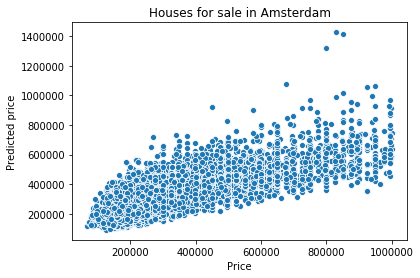

In [13]:
sns.scatterplot(x='price', y='price_p', data=df)#, ci=False) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Price') #use matplotlib to refine Seaborn plot
plt.ylabel('Predicted price')
plt.title('Houses for sale in Amsterdam')
plt.show()

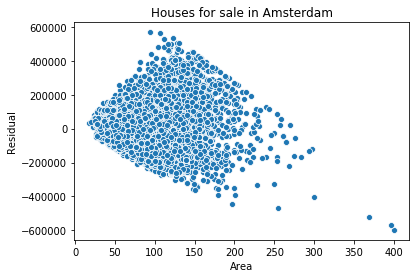

In [14]:
sns.scatterplot(x='area', y='residual', data=df)#, ci=False) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Area') #use matplotlib to refine Seaborn plot
plt.ylabel('Residual')
plt.title('Houses for sale in Amsterdam')
plt.show()

Bigger area = higher residual

In [15]:
#Calculate the model fit (R2) for the Y and predicted Y
r2_score(df['price'], df['price_p'])

0.5257421182315432

52,5% of the model can be explained. The higher the R2 → the better the model

In [16]:
#Calculate RMSE
math.sqrt(mean_squared_error(df['price'], df['price_p']))

118016.87861535022

The RMSE is 118 thousand. Which means that we are typically about 118 thousand off in our predicted views.

Smaller houses houses are predicted better (less residual) and cheap houses are predicted better (the dots are closer to eachother = less variance). The R^2 is higher than 50%, therefore the model can be seen as pretty realistic.